## OptimESM: NEMO Pipeline Regionalisation Diagnostics

In [1]:
import glob
import xarray as xr
from nemo_cookbook import NEMODataTree
import matplotlib.pyplot as plt

### EC-Earth3-ESM1 - Regional Mixed Layer Diagnostics

In [2]:
# Define path to domain_cfg:
fpath = "/g100/home/userexternal/otooth00/OptimESM/data/CINECA/SMHI/EC-Earth_Ofx/domain_cfg_Ofx_EC-Earth.nc"
ds_domain = xr.open_dataset(fpath).squeeze().rename({"z": "nav_lev"})

# Define path to eORCA1 monthly mean outputs:
exp_id="r1i1p1f1"
exp_name="esm-hist"
realm_name="OPmonLev"
variable_name="thetao"
fdir=f"/g100_store/DRES_OptimESM/ESGF/prepub/smhi/CMIP6Plus/CMIP/EC-Earth-Consortium/EC-Earth3-ESM-1/{exp_name}/{exp_id}/{realm_name}"
fpaths_gridT=f"{fdir}/{variable_name}/gn/v*/{variable_name}_{realm_name}_EC-Earth3-ESM-1_{exp_name}_{exp_id}_gn_*.nc"

# Define CFDatetimeCoder to decode time coords:
coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_gridT = xr.open_mfdataset(fpaths_gridT,
                             data_vars="minimal",
                             compat="no_conflicts",
                             decode_times=coder,
                             parallel=False,
                             engine="netcdf4"
                            )

ds_gridT = ds_gridT.rename({"i": "x",
                            "j": "y",
                            "lev": "deptht",
                             "time": "time_counter"
                              })

ds_gridT

<xarray.Dataset> Size: 63GB
Dimensions:             (time_counter: 1980, bnds: 2, deptht: 75, y: 292,
                         x: 362, vertices: 4)
Coordinates:
  * time_counter        (time_counter) datetime64[s] 16kB 1850-01-16T12:00:00...
  * deptht              (deptht) float64 600B 0.5058 1.556 ... 5.902e+03
  * y                   (y) int32 1kB 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
  * x                   (x) int32 1kB 1 2 3 4 5 6 7 ... 357 358 359 360 361 362
    latitude            (y, x) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude           (y, x) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time_counter, bnds) datetime64[s] 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (deptht, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    thetao              (time_counter, deptht, y, x) float32 63GB dask.array<chunksize=(1, 38, 146, 181), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              0.0
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    parent_mip_era:                     CMIP6Plus
    source:                             EC-Earth3-ESM-1 (2024): \naerosol: no...
    table_id:                           OPmonLev
    title:                              EC-Earth3-ESM-1 output prepared for
    license:                            CMIP6Plus model data produced by EC-E...
    description:                        CMIP6 historical (CO2 emission-driven)

In [3]:
variable_name="umo"
fpaths_gridU=f"{fdir}/{variable_name}/gn/v*/{variable_name}_{realm_name}_EC-Earth3-ESM-1_{exp_name}_{exp_id}_gn_*.nc"

# Define CFDatetimeCoder to decode time coords:
coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_gridU = xr.open_mfdataset(fpaths_gridU,
                             data_vars="minimal",
                             compat="no_conflicts",
                             decode_times=coder,
                             parallel=False,
                             engine="netcdf4"
                            )

ds_gridU = ds_gridU.rename({"i": "x",
                            "j": "y",
                            "lev": "depthu",
                             "time": "time_counter"
                              })

ds_gridU

<xarray.Dataset> Size: 63GB
Dimensions:             (time_counter: 1980, bnds: 2, depthu: 75, y: 292,
                         x: 362, vertices: 4)
Coordinates:
  * time_counter        (time_counter) datetime64[s] 16kB 1850-01-16T12:00:00...
  * depthu              (depthu) float64 600B 0.5058 1.556 ... 5.902e+03
  * y                   (y) int32 1kB 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
  * x                   (x) int32 1kB 1 2 3 4 5 6 7 ... 357 358 359 360 361 362
    latitude            (y, x) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude           (y, x) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time_counter, bnds) datetime64[s] 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (depthu, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    umo                 (time_counter, depthu, y, x) float32 63GB dask.array<chunksize=(1, 38, 146, 181), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              0.0
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    parent_mip_era:                     CMIP6Plus
    source:                             EC-Earth3-ESM-1 (2024): \naerosol: no...
    table_id:                           OPmonLev
    title:                              EC-Earth3-ESM-1 output prepared for
    license:                            CMIP6Plus model data produced by EC-E...
    description:                        CMIP6 historical (CO2 emission-driven)

In [4]:
variable_name="vmo"
fpaths_gridV=f"{fdir}/{variable_name}/gn/v*/{variable_name}_{realm_name}_EC-Earth3-ESM-1_{exp_name}_{exp_id}_gn_*.nc"

# Define CFDatetimeCoder to decode time coords:
coder = xr.coders.CFDatetimeCoder(time_unit="s")
ds_gridV = xr.open_mfdataset(fpaths_gridV,
                             data_vars="minimal",
                             compat="no_conflicts",
                             decode_times=coder,
                             parallel=False,
                             engine="netcdf4"
                            )

ds_gridV = ds_gridV.rename({"i": "x",
                            "j": "y",
                            "lev": "depthv",
                             "time": "time_counter"
                              })

ds_gridV

<xarray.Dataset> Size: 63GB
Dimensions:             (time_counter: 1980, bnds: 2, depthv: 75, y: 292,
                         x: 362, vertices: 4)
Coordinates:
  * time_counter        (time_counter) datetime64[s] 16kB 1850-01-16T12:00:00...
  * depthv              (depthv) float64 600B 0.5058 1.556 ... 5.902e+03
  * y                   (y) int32 1kB 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
  * x                   (x) int32 1kB 1 2 3 4 5 6 7 ... 357 358 359 360 361 362
    latitude            (y, x) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude           (y, x) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time_counter, bnds) datetime64[s] 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (depthv, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
    vmo                 (time_counter, depthv, y, x) float32 63GB dask.array<chunksize=(1, 38, 146, 181), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              0.0
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    parent_mip_era:                     CMIP6Plus
    source:                             EC-Earth3-ESM-1 (2024): \naerosol: no...
    table_id:                           OPmonLev
    title:                              EC-Earth3-ESM-1 output prepared for
    license:                            CMIP6Plus model data produced by EC-E...
    description:                        CMIP6 historical (CO2 emission-driven)

In [5]:
# Define dictionary of grid datasets defining eORCA1 parent model domain with no child/grand-child nests:
# Note: domain_cfg z-dimension is expected to be named 'nav_lev'.
datasets = {"parent":
            {"domain": ds_domain,
             "gridT": ds_gridT,
             "gridU": ds_gridU,
             "gridV": ds_gridV,
             }
            }

# Initialise a new NEMODataTree whose parent domain is zonally periodic & north-folding on F-points:
nemo = NEMODataTree.from_datasets(datasets=datasets, iperio=True, nftype="F", read_mask=True)

nemo

<xarray.DataTree>
Group: /
│   Dimensions:       (time_counter: 1980, bnds: 2)
│   Coordinates:
│     * time_counter  (time_counter) datetime64[s] 16kB 1850-01-16T12:00:00 ... 2...
│   Dimensions without coordinates: bnds
│   Data variables:
│       time_bnds     (time_counter, bnds) datetime64[s] 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
│   Attributes:
│       nftype:   F
│       iperio:   True
├── Group: /gridT
│       Dimensions:             (time_counter: 1980, bnds: 2, k: 75, j: 292, i: 362,
│                                vertices: 4)
│       Coordinates:
│         * k                   (k) int64 600B 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75
│         * j                   (j) int64 2kB 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
│         * i                   (i) int64 3kB 1 2 3 4 5 6 7 ... 357 358 359 360 361 362
│         * deptht              (k) float64 600B 0.5058 1.556 ... 5.698e+03 5.902e+03
│           latitude            (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
│           longitude           (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
│           gphit               (j, i) float32 423kB ...
│           glamt               (j, i) float32 423kB ...
│       Dimensions without coordinates: bnds, vertices
│       Data variables:
│           time_bnds           (time_counter, bnds) datetime64[s] 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
│           lev_bnds            (k, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
│           vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
│           vertices_longitude  (j, i, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
│           thetao              (time_counter, k, j, i) float32 63GB dask.array<chunksize=(1, 38, 146, 181), meta=np.ndarray>
│           e1t                 (j, i) float64 846kB ...
│           e2t                 (j, i) float64 846kB ...
│           tmask               (k, j, i) float32 32MB 0.0 0.0 0.0 0.0 ... nan nan nan
│           tmaskutil           (j, i) float32 423kB 0.0 0.0 0.0 0.0 ... nan nan nan nan
│       Attributes:
│           nftype:   F
│           iperio:   True
├── Group: /gridU
│       Dimensions:             (time_counter: 1980, bnds: 2, k: 75, j: 292, i: 362,
│                                vertices: 4)
│       Coordinates:
│         * k                   (k) int64 600B 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75
│         * j                   (j) int64 2kB 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
│         * i                   (i) float64 3kB 1.5 2.5 3.5 4.5 ... 360.5 361.5 362.5
│         * depthu              (k) float64 600B 0.5058 1.556 ... 5.698e+03 5.902e+03
│           latitude            (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
│           longitude           (j, i) float64 846kB dask.array<chunksize=(292, 362), meta=np.ndarray>
│           gphiu               (j, i) float32 423kB ...
│           glamu               (j, i) float32 423kB ...
│       Dimensions without coordinates: bnds, vertices
│       Data variables:
│           time_bnds           (time_counter, bnds) datetime64[s] 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
│           lev_bnds            (k, bnds) float64 1kB dask.array<chunksize=(75, 2), meta=np.ndarray>
│           vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
│           vertices_longitude  (j, i, vertices) float64 3MB dask.array<chunksize=(292, 362, 4), meta=np.ndarray>
│           umo                 (time_counter, k, j, i) float32 63GB dask.array<chunksize=(1, 38, 146, 181), meta=np.ndarray>
│           e1u                 (j, i) float64 846kB ...
│           e2u                 (j, i) float64 846kB ...
│           umask               (k, j, i) float32 32MB 0.0 0.0 0.0 0.0 ... nan nan nan
│           umaskutil           (j, i) float32 

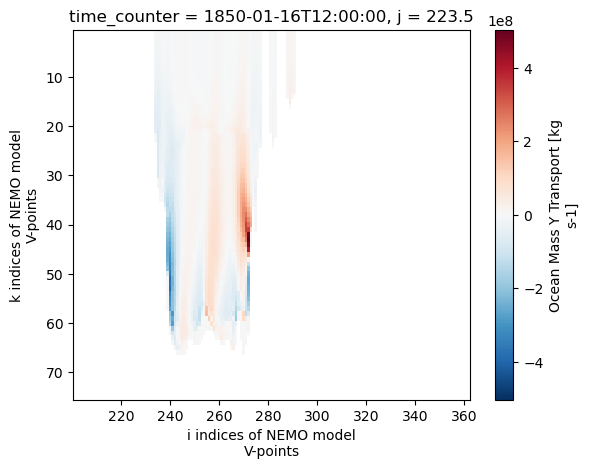

In [16]:
nemo['gridV']['vmo'][0, :, 222, 200:].plot(yincrease=False)
# plt.axhline(y=222, lw=3, color='0.1')

-1.6267676


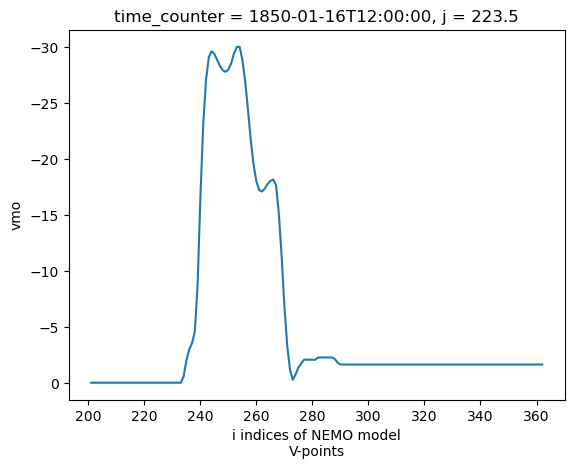

In [22]:
rho0 = 1025 # kg m-3
(nemo['gridV']['vmo'][0, :, 222, 200:] / (1E6 * rho0)).sum(dim='k').cumsum(dim='i').plot(yincrease=False)

print((nemo['gridV']['vmo'][0, :, 222, 200:] / (1E6 * rho0)).sum(dim=['k', 'i']).values)

In [ ]:
import numpy as np
from skimage import measure
from nemo_cookbook.masks import create_polygon_mask

i_poly = np.array([226, 226, 230, 245, 257, 266, 277, 281, 285, 285, 285, 233, 226]) + 0.5
j_poly = np.array([275, 286, 291, 291, 289, 282, 278, 270, 262, 255, 255, 255, 275]) + 0.5 - 39

mask_SPNA = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                                lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                                lon_poly=i_poly,
                                lat_poly=j_poly,
                                dims=('j', 'i')
                                )

mask_SPNA_data = mask_SPNA.astype('int').values
boundary = measure.find_contours(image=mask_SPNA_data, level=0.5)

In [ ]:
# Plot:
da_mlotst = nemo['gridT']['thetao'].isel(k=0).where(nemo['gridT']['tmaskutil'])
da_mlotst.isel(time_counter=2).where(mask_SPNA).plot(xlim=[200, 300], ylim=[200, 280])

# plt.plot([234, 285], [256, 256], lw=2, color='pink')
# plt.plot([230, 245], [292, 292], lw=2, color='pink')
# plt.plot([226, 226], [275, 286], lw=2, color='pink')
# plt.plot([285, 285], [256, 262], lw=2, color='pink')
# plt.scatter([257, 267, 277, 281], [289, 282, 278, 270], color='pink')

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='coral')

In [ ]:
i_poly = np.array([bdy[1] for bdy in boundary[0]][-55:-12])
j_poly = np.array([bdy[0] for bdy in boundary[0]][-55:-12])
i_poly = np.concatenate([i_poly, np.array([263, 280, 294, 294, 281])]) + 0.5
j_poly = np.concatenate([j_poly + 0.5, np.array([310, 310, 299, 278, 270]) - 39]) + 0.5

mask_GIN = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                           lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                           lon_poly=i_poly,
                           lat_poly=j_poly,
                           dims=('j', 'i')
                           )

mask_GIN_data = mask_GIN.astype('int').values
boundary_GIN = measure.find_contours(image=mask_GIN_data, level=0.5)

In [ ]:
(mask_SPNA.astype(int) + mask_GIN.astype(int)).plot()

In [ ]:
# Plot:
da_mlotst.isel(time_counter=2).where((mask_SPNA)).plot(xlim=[200, 300], ylim=[200, 280], cmap='viridis') # .where(mask | mask_GIN)
da_mlotst.isel(time_counter=2).where((mask_GIN)).plot(xlim=[200, 300], ylim=[200, 280], cmap='RdBu_r') # .where(mask | mask_GIN)

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='pink')
plt.plot([bdy[1] for bdy in boundary_GIN[0]], [bdy[0] for bdy in boundary_GIN[0]], color='coral')

i = np.array([bdy[1] for bdy in boundary[0]][-55:-12])
j = np.array([bdy[0] for bdy in boundary[0]][-55:-12])
i = np.concatenate([i, np.array([263, 280, 294, 294, 281])])
j = np.concatenate([j, np.array([310, 310, 299, 278, 270])])



In [ ]:
# Plot:
da_mlotst.isel(time_counter=2).plot(ylim=[200, 280])

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='pink')

i = np.concatenate([np.array([230, 230, 200, 200, 330, 330]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][-30:]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][:41]),
                    np.array([245, 230])])
j = np.concatenate([np.array([291, 306, 306, 331, 331, 295]) - 39,
                    np.array([bdy[0] for bdy in boundary_GIN[0]][-30:]) + 0.5,
                    np.array([bdy[0] for bdy in boundary_GIN[0]][:41]) + 0.5,
                    np.array([291, 291]) - 39])

plt.plot(i, j, color='pink')


In [ ]:
i_poly = np.concatenate([np.array([230, 230, 200, 200, 330, 330]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][-30:]),
                    np.array([bdy[1] for bdy in boundary_GIN[0]][:41]),
                    np.array([245, 230])]) + 0.5

j_poly = np.concatenate([np.array([291, 306, 306, 330, 330, 295]) - 39,
                    np.array([bdy[0] for bdy in boundary_GIN[0]][-30:]) + 0.5,
                    np.array([bdy[0] for bdy in boundary_GIN[0]][:41]) + 0.5,
                    np.array([291, 291]) - 39]) + 0.5

mask_AO = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                              lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                              lon_poly=i_poly,
                              lat_poly=j_poly,
                              dims=('j', 'i')
                             )

mask_AO_data = mask_AO.astype('int').values
boundary_AO = measure.find_contours(image=mask_AO_data, level=0.5)

In [ ]:
mask_AO_LHS = create_polygon_mask(lon_grid=nemo['gridT']['i'].expand_dims(dim={"j": nemo['gridT']['j'].size}, axis=0),
                                  lat_grid=nemo['gridT']['j'].expand_dims(dim={"i": nemo['gridT']['i'].size}, axis=1),
                                  lon_poly=np.array([40, 158, 158, 40, 40]),
                                  lat_poly=np.array([285, 285, 331, 331, 285]) - 39,
                                  dims=('j', 'i')
                                 )

In [ ]:
mask_AO_complete = mask_AO | mask_AO_LHS

In [ ]:
# -- Plotting -- #
mask_AO_complete.where(mask_AO_complete).plot(ylim=[200, 280], cmap='Greens')
mask_SPNA.where(mask_SPNA).plot(ylim=[200, 280], cmap='Reds')
mask_GIN.where(mask_GIN).plot(ylim=[200, 280], cmap='Blues')

plt.plot([bdy[1] for bdy in boundary[0]], [bdy[0] for bdy in boundary[0]], color='0.1')
plt.plot([bdy[1] for bdy in boundary_GIN[0]], [bdy[0] for bdy in boundary_GIN[0]], color='0.1')
plt.plot([bdy[1] for bdy in boundary_AO[0]], [bdy[0] for bdy in boundary_AO[0]], color='0.1')


In [ ]:
da_mlotst.isel(time_counter=2).where(mask_AO_complete).plot(ylim=[200, 280])

plt.plot([bdy[1] for bdy in boundary_AO[0]], [bdy[0] for bdy in boundary_AO[0]], color='coral')

In [ ]:
# Plot:
plt.figure(figsize=(12, 5))
da_mlotst.isel(time_counter=2).where(mask_SPNA).plot(xlim=[0, 360], ylim=[200, 280], cmap='viridis')
da_mlotst.isel(time_counter=2).where(mask_GIN).plot(xlim=[0, 360], ylim=[200, 280], cmap='RdBu_r')
da_mlotst.isel(time_counter=2).where(mask_AO_complete).plot(xlim=[0, 360], ylim=[200, 280], cmap='cividis_r')


In [ ]:
(mask_AO_complete.astype(int) + mask_GIN.astype(int) + mask_SPNA.astype(int)).plot()

In [ ]:
nemo_bdy = nemo.extract_mask_boundary(mask=mask_SPNA, uv_vars=['umo', 'vmo']).isel(time_counter=-10)

nemo_bdy


In [ ]:
plt.scatter(nemo_bdy.glamb, nemo_bdy.gphib, c=np.arange(nemo_bdy.gphib.size))
plt.colorbar()

In [ ]:
# (nemo_bdy['velocity'] / 1025).sum(dim='k').cumsum(dim='bdy').plot()
# plt.axhline(y=0)

(nemo_bdy['velocity'] / 1025).plot(vmin=-0.6E6, vmax=0.6E6)

In [ ]:
nemo['gridT/thetao'].where(mask_SPNA).isel(time_counter=slice(0, 120)).weighted((nemo['gridT/e1t'] * nemo['gridT/e2t']).fillna(0)).mean(dim=['i', 'j']).plot(y='k', yincrease=False)


## Test Regional Masks:

In [ ]:
ds_mask = xr.open_dataset("/g100/home/userexternal/otooth00/OptimESM/data/CINECA/SMHI/EC-Earth_Ofx/regional_masks_Ofx_EC-Earth3-ESM1.nc")
ds_mask

In [ ]:
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['aomsk']).plot(cmap='viridis')
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['spnamsk']).plot()
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['ginmsk']).plot(cmap='cividis')

In [ ]:
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['aomsk_oo']).plot(cmap='viridis')
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['spnamsk_oo']).plot()
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['ginmsk_oo']).plot(cmap='cividis')

In [ ]:
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['aomsk_ss']).plot(cmap='viridis')
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['spnamsk_ss']).plot()
nemo['gridT/thetao'].isel(k=0, time_counter=0).where(nemo['gridT/tmaskutil'] & ds_mask['ginmsk_ss']).plot(cmap='cividis')

In [ ]:
ds_gridV.lev_bnds.values